# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# File Reading

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Data Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
np.round(df.corr(numeric_only=True),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


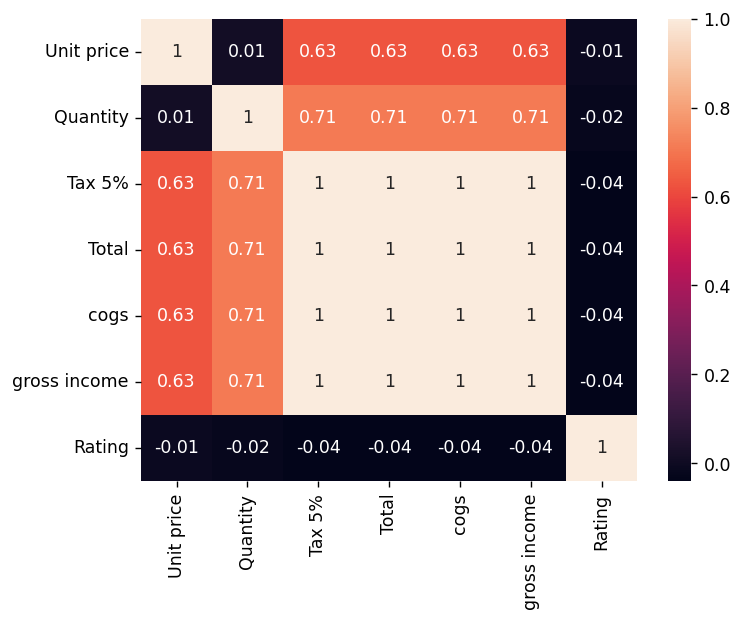

In [5]:
plt.figure(dpi=125)
tempdf=df
tempdf.drop(columns=['gross margin percentage'],inplace=True)
sns.heatmap(np.round(tempdf.corr(numeric_only=True),2),annot=True)
plt.show()

In [6]:
# Changing Date type to datetime

In [7]:
df['Date']=pd.to_datetime(df['Date'])

df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year

In [8]:
# Changing Time type to datetime

In [9]:
df['Time'] = pd.to_datetime(df['Time'])

df['Hour'] = (df['Time']).dt.hour

In [10]:
df.describe(include='all',datetime_is_numeric=True)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,day,month,year,Hour
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,NaN,NaN,Ewallet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,NaN,NaN,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,2023-06-01 15:24:41.880000,NaN,307.58738,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2023-06-01 10:00:00,NaN,10.17000,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2023-06-01 12:43:00,NaN,118.49750,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2023-06-01 15:19:00,NaN,241.76000,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2023-06-01 18:15:00,NaN,448.90500,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2023-06-01 20:59:00,NaN,993.00000,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [11]:
print('Missing values: '+ str(df.isna().sum().max()))
print('Branch Unique values: '+str(df.Branch.unique()))
print('City Unique values: '+str(df.City.unique()))
print('Customer type Unique values: '+str(df['Customer type'].unique()))
print('Product line Unique values: '+str(df['Product line'].unique()))
print('Payment Unique values: '+str(df['Payment'].unique()))
print('Time Unique hours: '+str(df['Hour'].unique()))
print('Invoice ID Unique values count vs non unique count: '+str(len(df['Invoice ID'].unique()))+' to '+str(df['Invoice ID'].count()))
print('\nDo the columns contain only numeric values?')
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

Missing values: 0
Branch Unique values: ['A' 'C' 'B']
City Unique values: ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type Unique values: ['Member' 'Normal']
Product line Unique values: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Payment Unique values: ['Ewallet' 'Cash' 'Credit card']
Time Unique hours: [13 10 20 18 14 11 17 16 19 15 12]
Invoice ID Unique values count vs non unique count: 1000 to 1000

Do the columns contain only numeric values?


Invoice ID       False
Branch           False
City             False
Customer type    False
Gender           False
Product line     False
Unit price        True
Quantity          True
Tax 5%            True
Total             True
Date              True
Time              True
Payment          False
cogs              True
gross income      True
Rating            True
day               True
month             True
year              True
Hour              True
dtype: bool

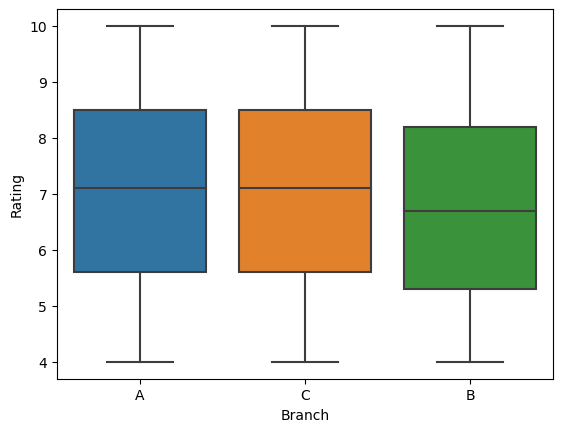

In [12]:
sns.boxplot(df,x="Branch", y = "Rating")
plt.show()

Branch B has the lowest rating in comparison to A and C

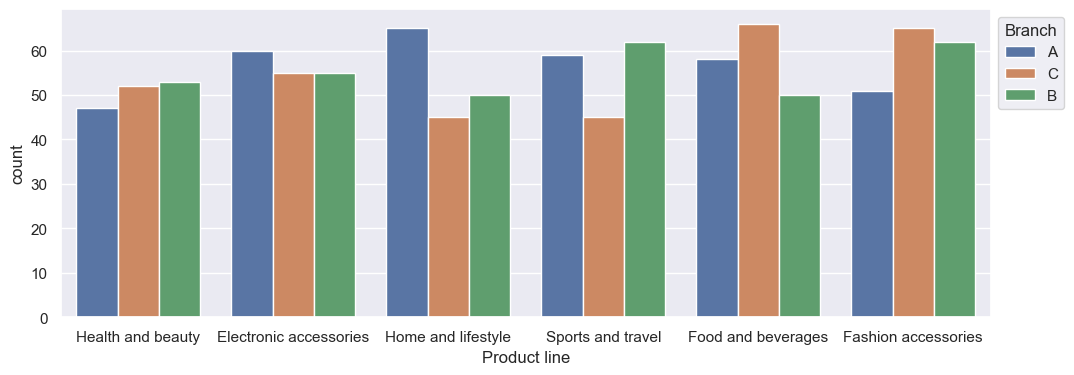

In [13]:
plt.figure(figsize=(12,4))
sns.set_theme(style="darkgrid")
ax=sns.countplot(df, x="Product line",hue="Branch")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

An overview of product line sales by each branch

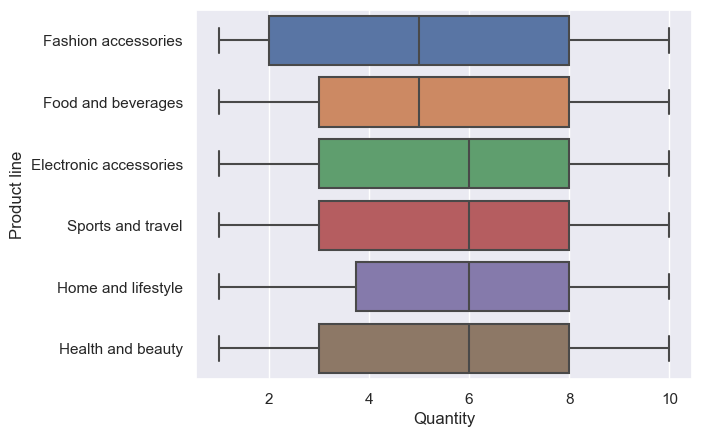

In [14]:
sns.boxplot(df,y="Product line", x = "Quantity",order = df['Product line'].value_counts().index)
plt.show()

We can see here that Home and lifestyle has the least range of selling by quantity, however it doesn't mean it sold the lowest.

Promoting certain product lines that have high quantity sold can increase revenue.

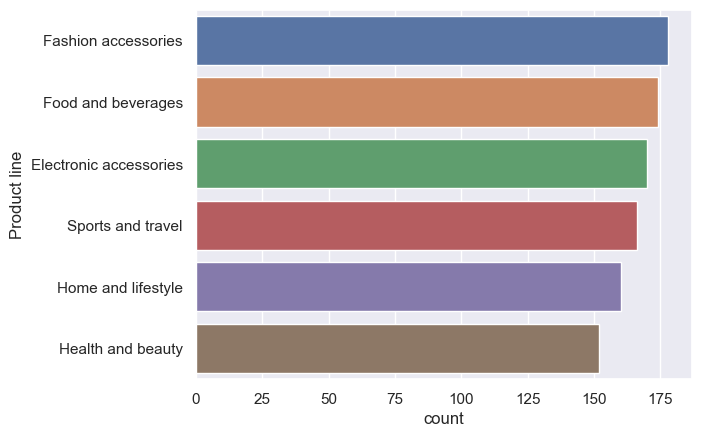

In [15]:
sns.countplot(df,y = 'Product line', order = df['Product line'].value_counts().index )
plt.show()

By count of Product line sales we can see that fashion accessories sold the highest and Health and beauty sold the lowest

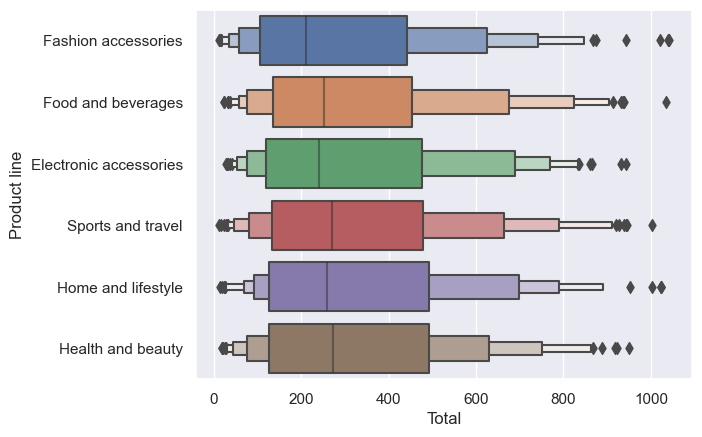

In [16]:
sns.boxenplot(df,y = 'Product line', x = 'Total', order = df['Product line'].value_counts().index)
plt.show()

By total sales Fashion accessories sold the highest and Heath and beauty the lowest

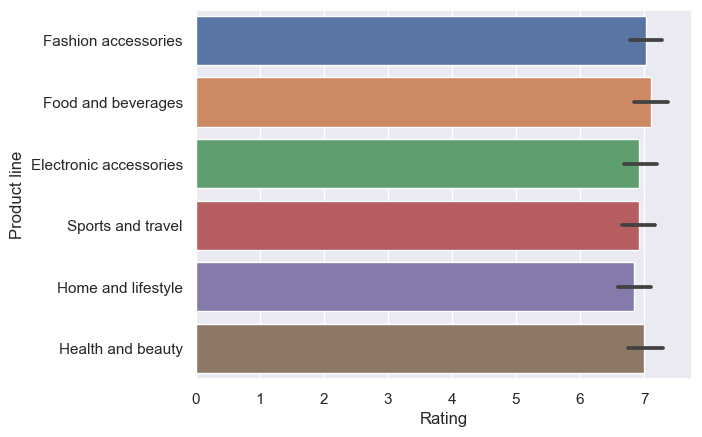

In [17]:
sns.barplot(df,y = 'Product line', x = 'Rating', order = df['Product line'].value_counts().index)
plt.show()

As for rating Fashion accessories, Food and Beverages and Health and Beauty having the highest rating.

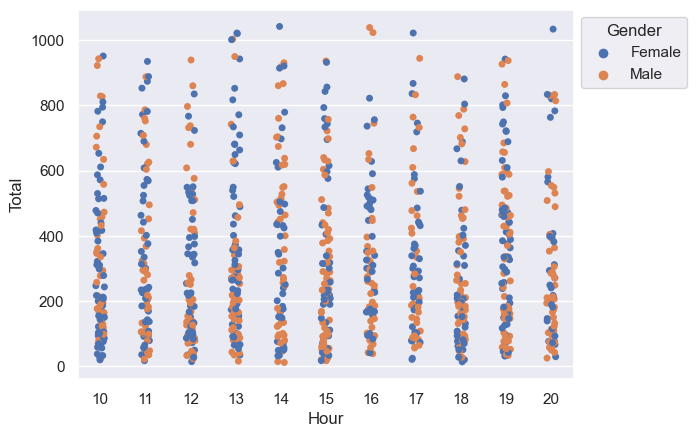

In [18]:
ax=sns.stripplot(df, y="Total", x="Hour",hue="Gender", legend=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

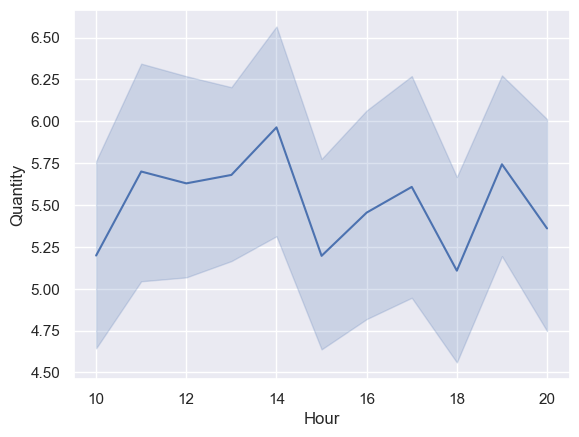

In [19]:
sns.lineplot(df,x="Hour", y= "Quantity")
plt.show()

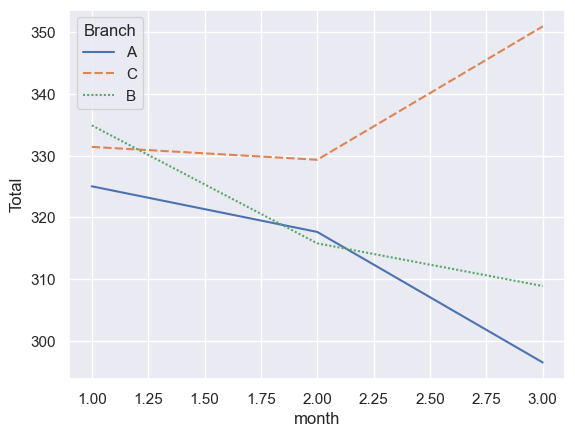

In [20]:
sns.lineplot(df,x="month", y= "Total",hue="Branch",style="Branch",errorbar=None)
plt.show()

Total branch sales by month

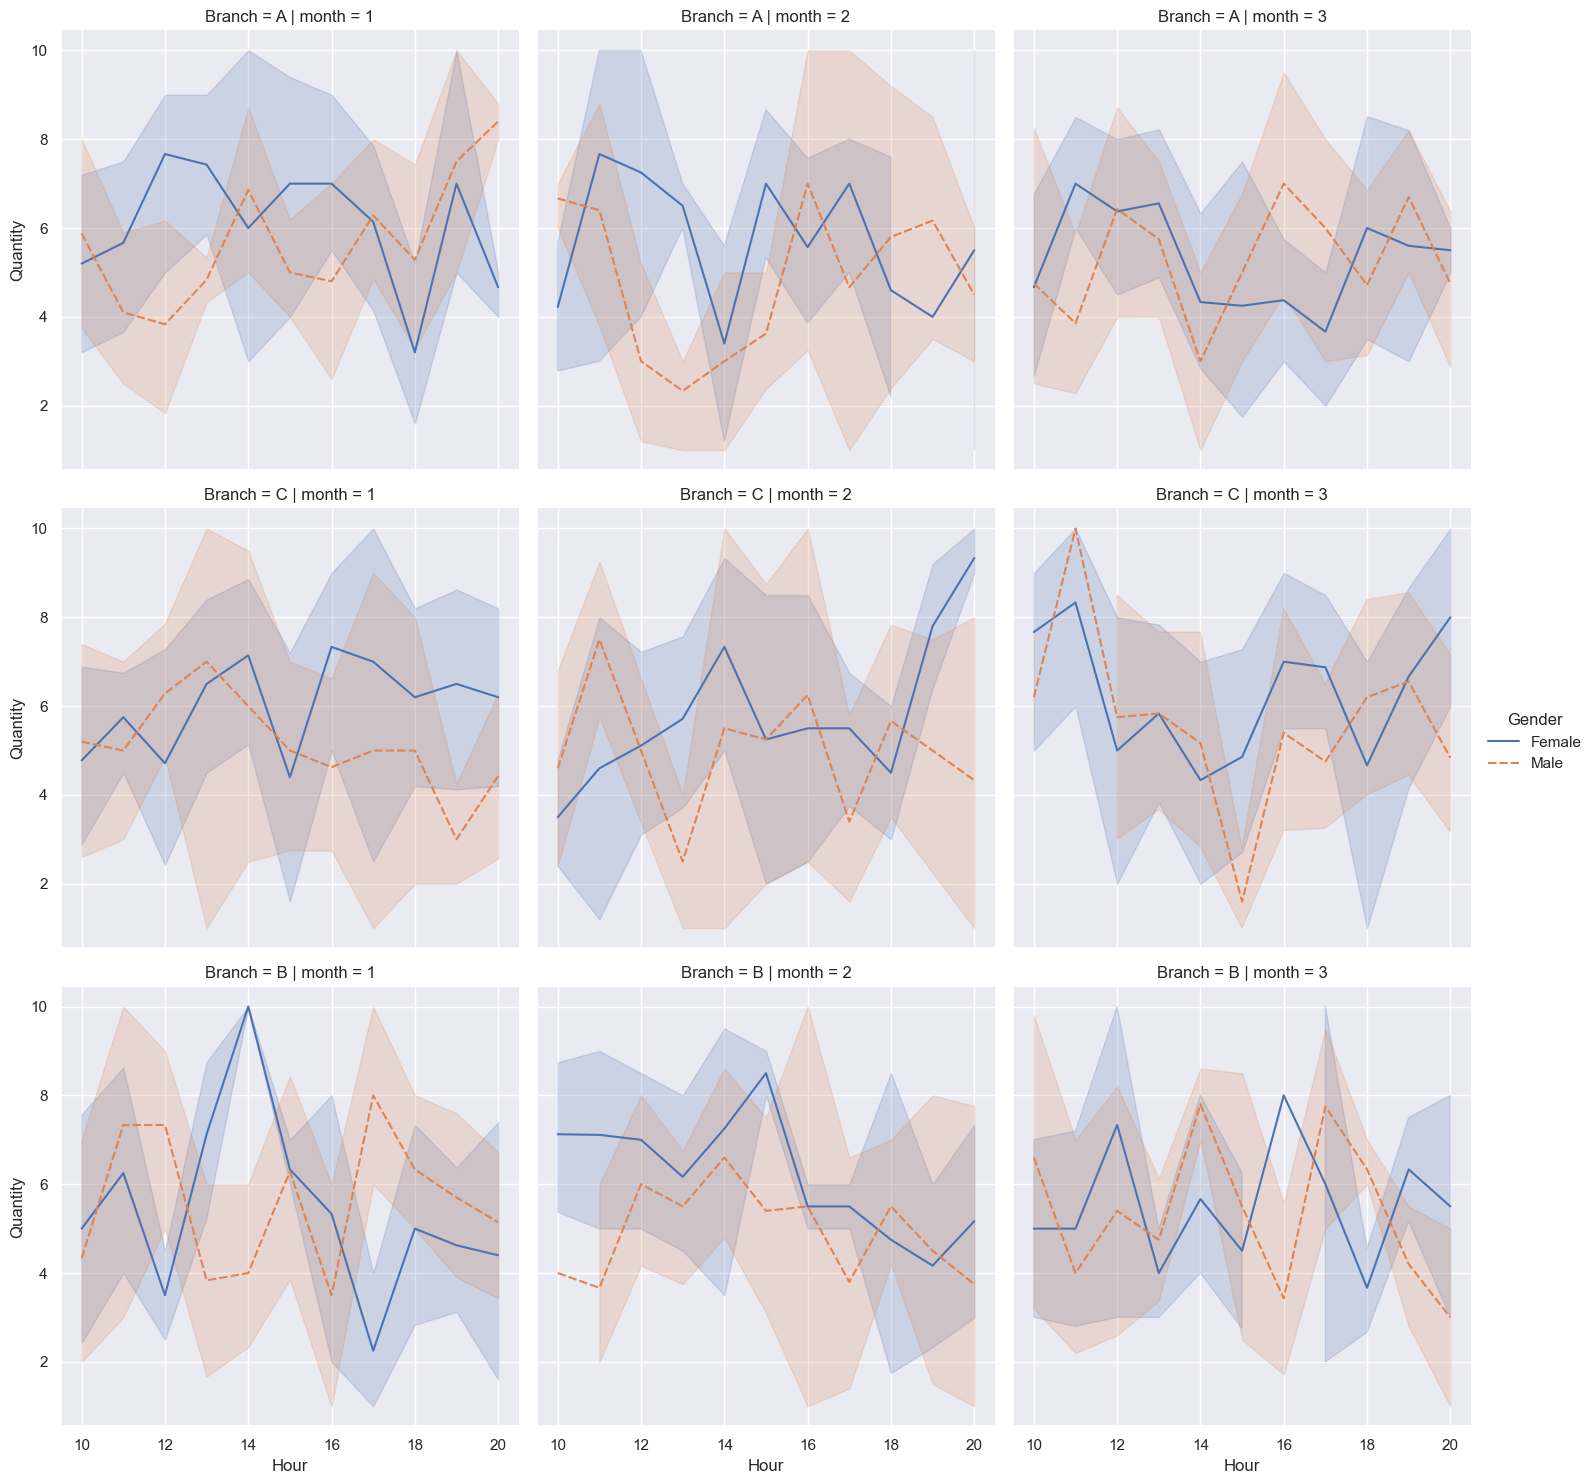

In [21]:
sns.relplot(df,x='Hour',  y = 'Quantity', col= 'month' , row= 'Branch', kind='line',hue='Gender', style='Gender')
plt.show()

We can see how each branch's sales quantity looks like by the hour in a monthly fashion

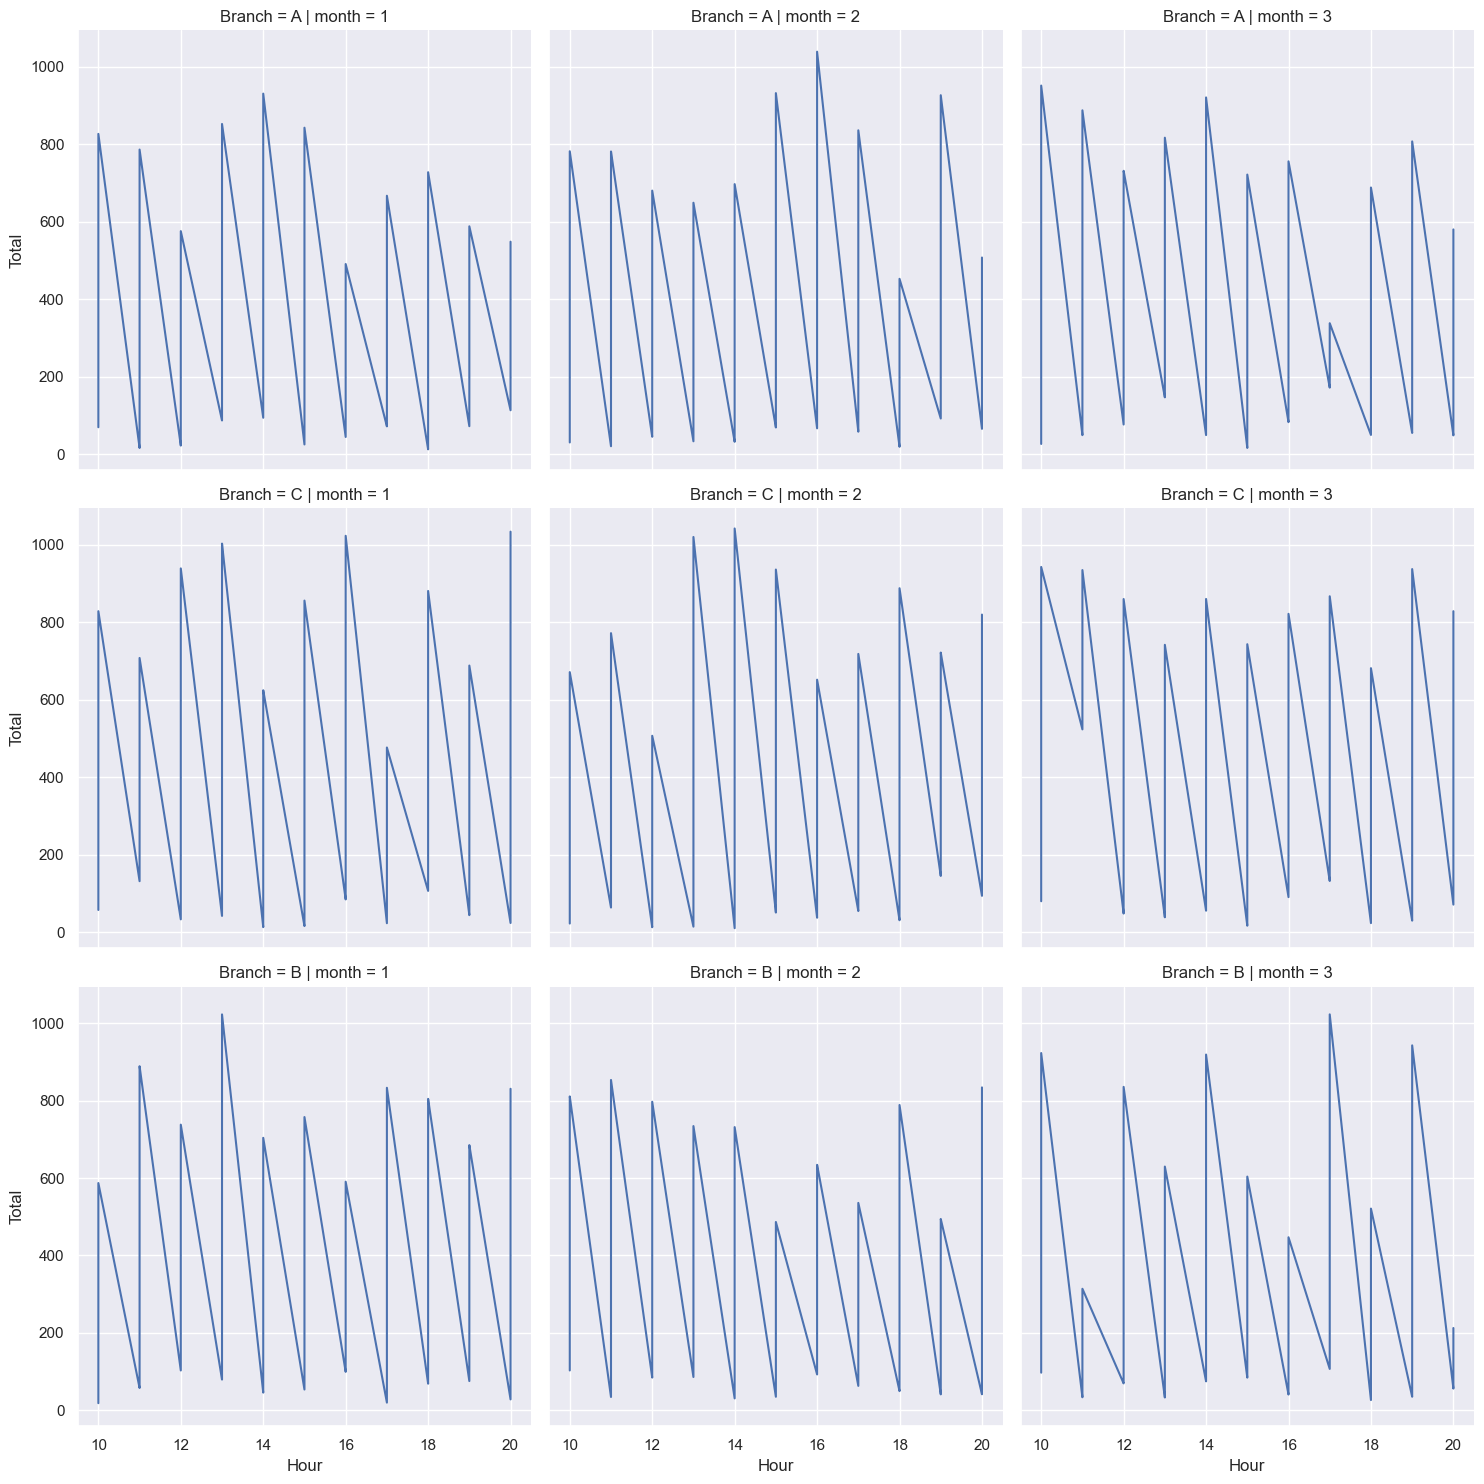

In [22]:
sns.relplot(df,x="Hour",  y = 'Total', col= 'month' , row= 'Branch', kind="line", estimator=None)
plt.show()

We can see each branch's total sales by the hour in a monthly fashion

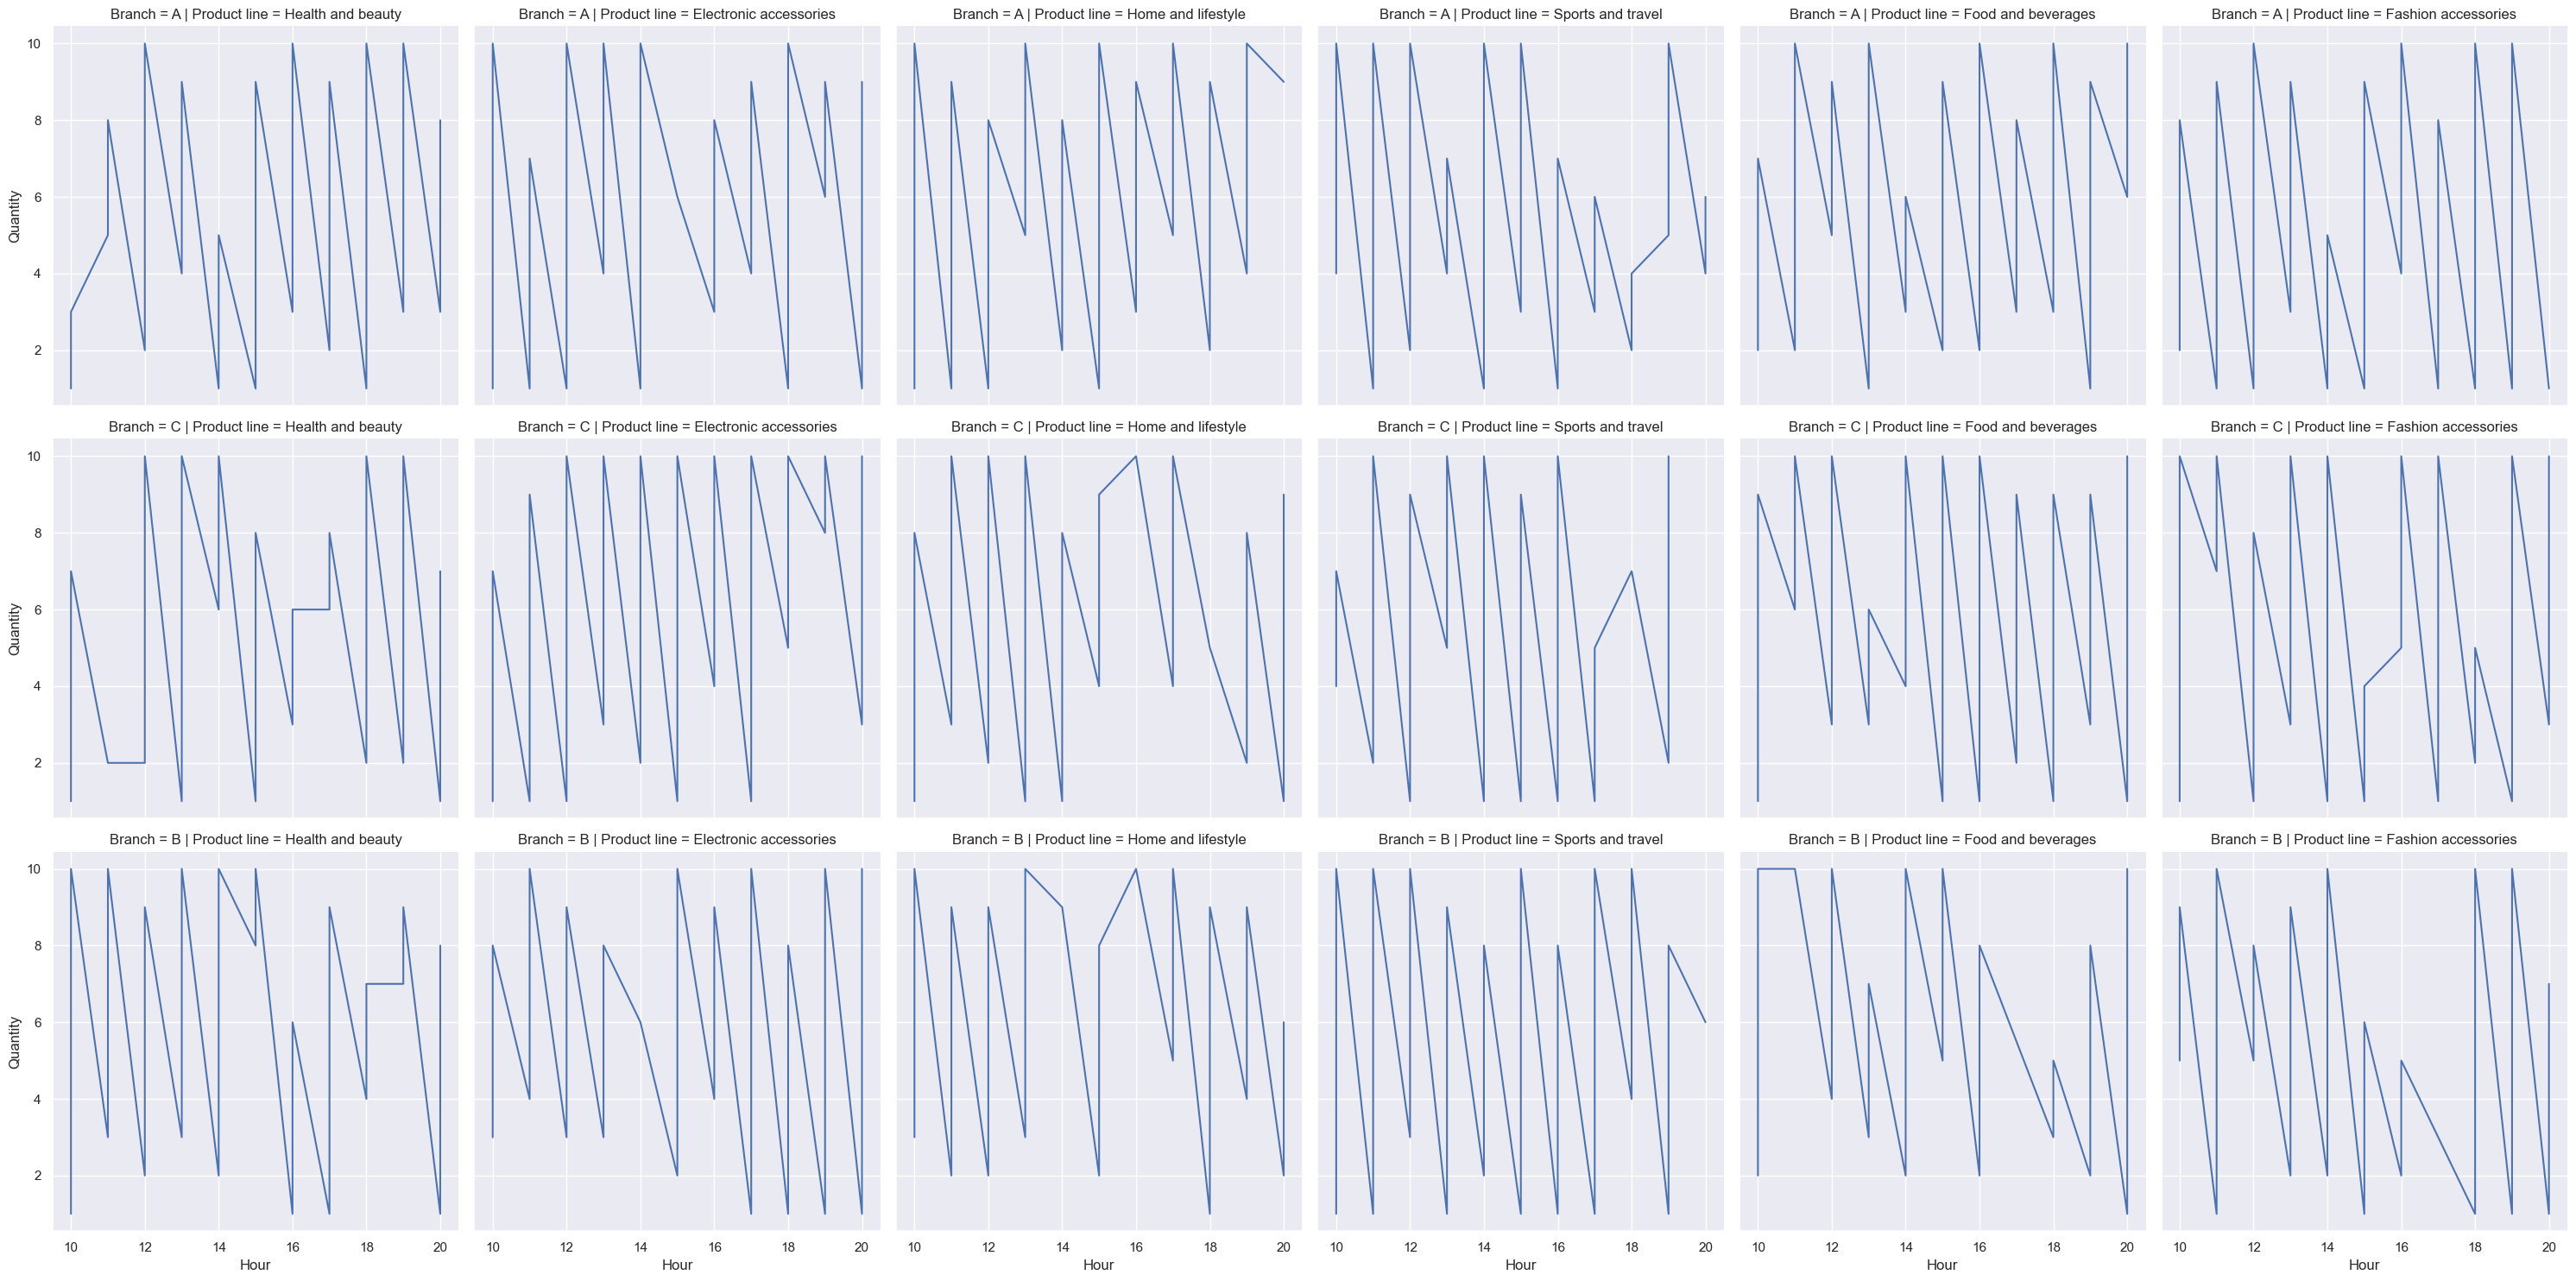

In [23]:
sns.relplot(df,x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', kind="line",estimator=None)
plt.show()

We can see that food and beverages sales usually high in all three branches at evening especially around 19:00

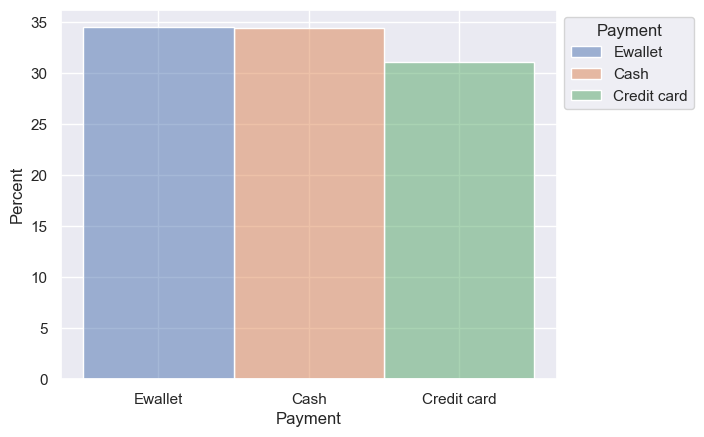

In [24]:
ax=sns.histplot(df,x="Payment", hue="Payment", stat="percent", discrete=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Most of the customers pay through Ewallet and Cash

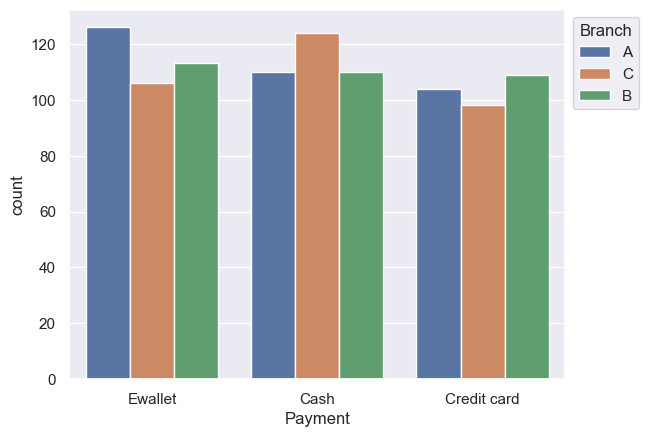

In [25]:
ax=sns.countplot(df,x="Payment", hue="Branch")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

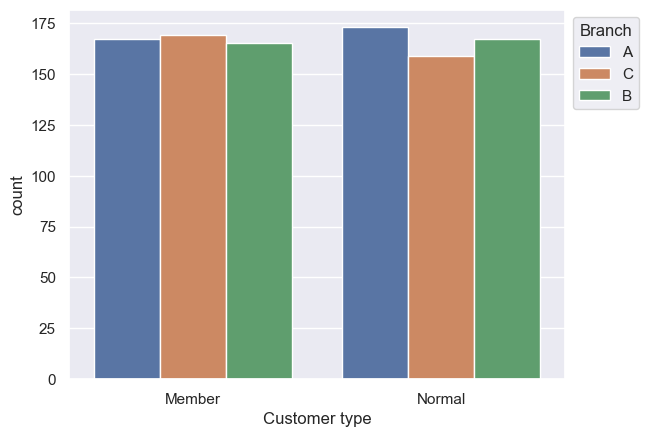

In [26]:
ax=sns.countplot(df,x="Customer type", hue="Branch")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

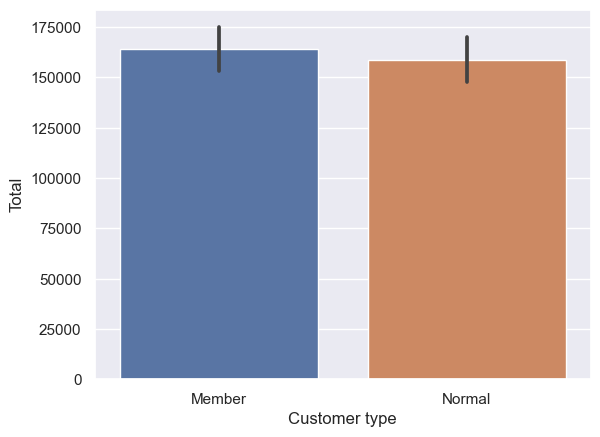

In [27]:
sns.barplot(df,x="Customer type", y="Total", estimator = sum)
plt.show()

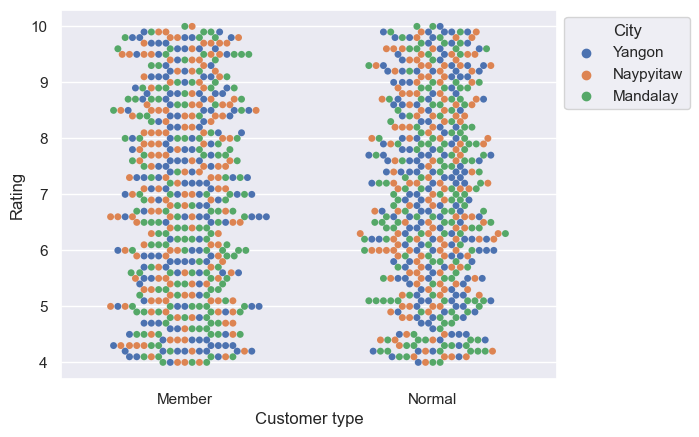

In [28]:
ax=sns.swarmplot(df,x="Customer type",  y = 'Rating',hue='City')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [29]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in df:
    df['long'] = df['City'].map(long)
    df['lat'] = df['City'].map(lat)

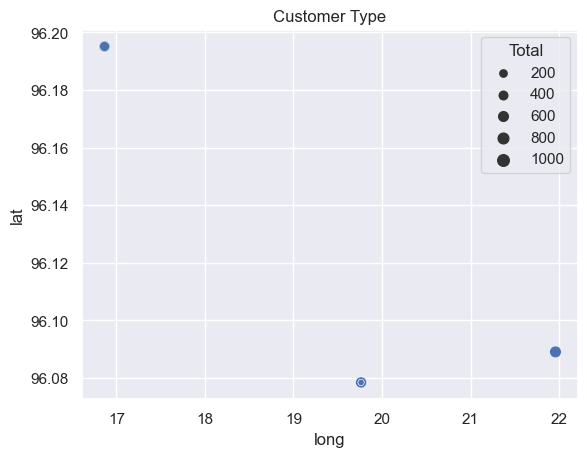

In [30]:
sns.scatterplot(df,x="long",  y = "lat",size = "Total", legend = "brief").set_title("Customer Type") 
plt.show()